## How does book length effect average ratings?
#### By genre? word count vs page count different?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

books_df = pd.read_csv('books_genre.csv')

In [2]:
# data exploration
books_df.info()
books_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             11127 non-null  int64  
 1   Title               11127 non-null  object 
 2   Author              11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  genres              11030 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


#### Clean data

In [3]:
# print null values for each column
print(books_df.isnull().sum())

Book Id                0
Title                  0
Author                 0
average_rating         0
isbn                   0
isbn13                 0
language_code          0
num_pages              0
ratings_count          0
text_reviews_count     0
publication_date       0
publisher              0
genres                97
dtype: int64


In [3]:
# remove books where genre is null
books_df = books_df.dropna(subset=['genres'])

In [5]:
print(books_df.isnull().sum())

Book Id               0
Title                 0
Author                0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
genres                0
dtype: int64


In [6]:
# How many books are not rated? (average_rating is 0.0)
books_df[books_df['average_rating'] == 0.0].shape[0]


15

In [4]:
# remove books rated as 0.0
books_df = books_df[books_df['average_rating'] > 0.0]
books_df[books_df['average_rating'] == 0.0].shape[0]

0

In [8]:
# How many duplicate book titles are there?
print(books_df.Title.duplicated().sum())

773


In [5]:
# remove duplicates based on title and authors
books_df.drop_duplicates(subset='Title', keep='first', inplace=True)
print(books_df.Title.duplicated().sum())

0


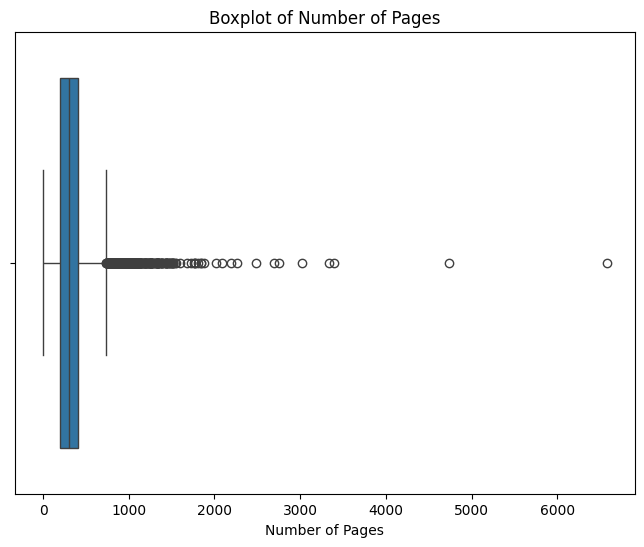

In [10]:
# boxplot of num_pages to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=books_df['num_pages'])
plt.title('Boxplot of Number of Pages')
plt.xlabel('Number of Pages')
plt.show()

In [6]:
# create new dataframe for books greater than 1000 pages
long_books = books_df[books_df['num_pages'] > 1500]

# print the tile and page number of these books
for index, row in long_books.iterrows():
    print(f"{row['Title']}: {row['num_pages']} pages")

Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5): 2690 pages
Harry Potter Collection (Harry Potter  #1-6): 3342 pages
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings: 1728 pages
The Iliad/The Odyssey: 1556 pages
The Complete Pelican Shakespeare: 1808 pages
The History of the Lord of the Rings (The History of Middle-earth #6-9): 1680 pages
The Complete Anne of Green Gables Boxed Set (Anne of Green Gables  #1-8): 2088 pages
The New Annotated Sherlock Holmes: The Complete Short Stories: 1878 pages
Plato: Complete Works: 1838 pages
Rabbit Angstrom: The Four Novels: 1520 pages
The Lord of the Rings / The Hobbit: 1600 pages
The Collected Letters of C.S. Lewis  Volume 3: Narnia  Cambridge  and Joy  1950 - 1963: 1840 pages
The Norton Anthology of Short Fiction: 1776 pages
The Complete Works: The Revised Oxford Translation  Vol. 1: 1757 pages
Literary Criticism  Vol. 1: Essays on Literature / American Writers / English Writers: 1504 pages
Study Bible: NIV: 2198 pages

In [7]:
# since most books over 1500 pages are collections or encyclopedias, we will remove them
books_df = books_df[books_df['num_pages'] <= 1500]

In [8]:
books_df.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10214.000000,10214.000000,1.021400e+04,10214.000000,1.021400e+04,10214.000000
mean,21390.153613,3.941608,9.761673e+12,329.497650,1.736014e+04,535.330625
std,13077.694571,0.293439,4.235895e+11,207.241815,1.082649e+05,2516.081141
min,1.000000,2.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10416.250000,3.770000,9.780345e+12,195.000000,1.140000e+02,9.000000
50%,20651.500000,3.960000,9.780575e+12,296.500000,8.300000e+02,49.000000
75%,32101.250000,4.140000,9.780872e+12,409.750000,5.422750e+03,249.000000
max,45641.000000,5.000000,9.790008e+12,1500.000000,4.597666e+06,94265.000000


In [9]:
sep_genres = books_df["genres"]=books_df["genres"].apply(lambda x: ';'.join( x.split(';')[:4] ).split(",")[0] )

# Find the largest number of genres for a book?
max_genres = sep_genres.apply(lambda x: len(x.split(';'))).max()

genres_df = books_df.copy()
# Split genres into separate columns and save into new df
for i in range(max_genres):
    genres_df[f'genre_{i+1}'] = sep_genres.apply(lambda x: x.split(';')[i] if len(x.split(';')) > i else np.nan)
genres_df = genres_df.drop(columns=['genres'])
genres_df.head()

,Book Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre_1,genre_2,genre_3,genre_4
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,Young Adult,Fiction,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,Fiction,Young Adult,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,Fiction,Young Adult,Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,Fiction,NaN,NaN,NaN


## Explore Data and find what might affect the ratings? what makes them higher or lower?

Text(0, 0.5, 'Frequency')

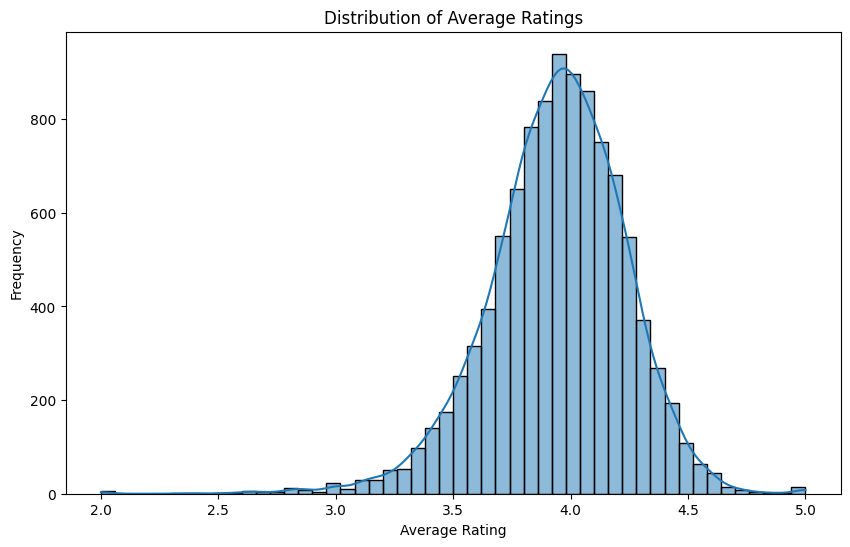

In [15]:
# plot for average_rating
plt.figure(figsize=(10, 6))
sns.histplot(books_df['average_rating'], bins=50, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

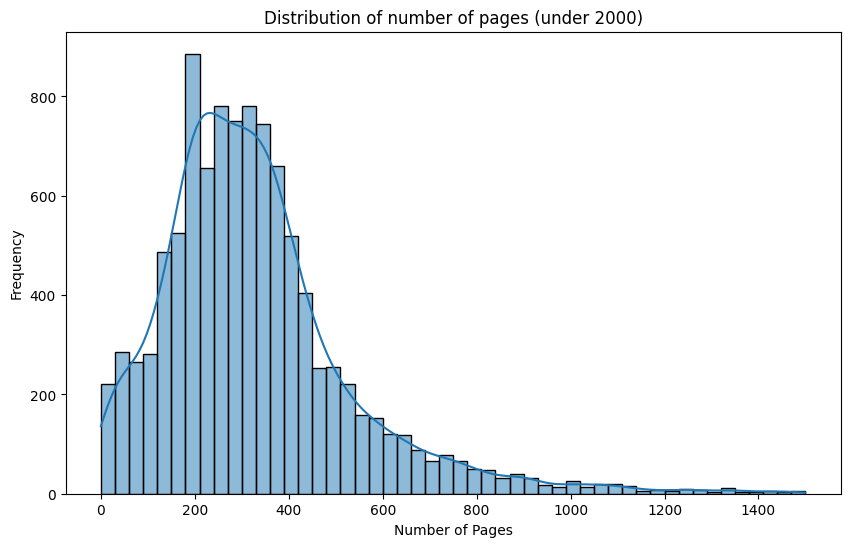

In [16]:
# remove books with over 2000 pages for better visualization
books_df_filtered = books_df[books_df['num_pages'] <= 2000]

plt.figure(figsize=(10, 6))
sns.histplot(books_df_filtered['num_pages'], bins=50, kde=True)
plt.title('Distribution of number of pages (under 2000)')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')

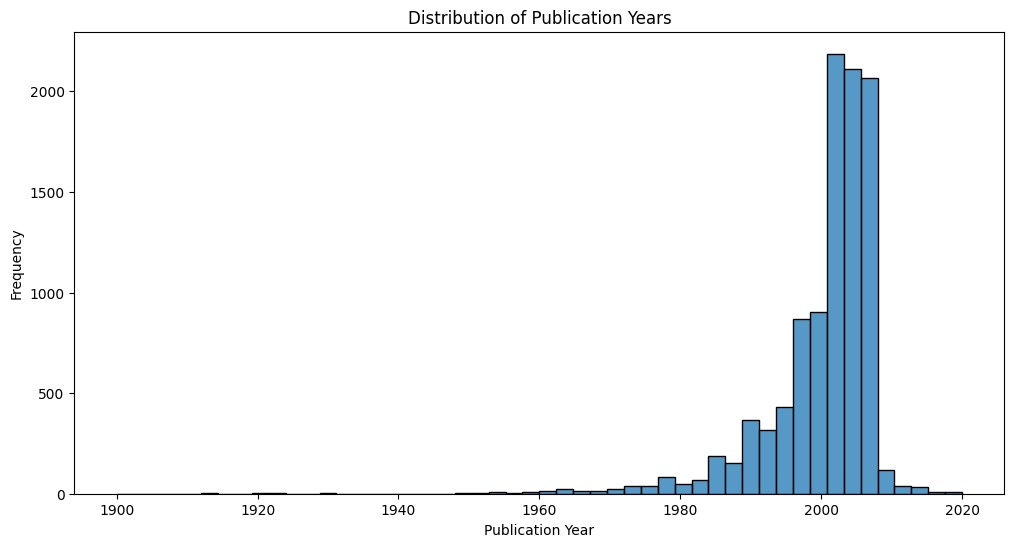

In [34]:
test_df = books_df.copy()
test_df['publication_date'] = pd.to_datetime(test_df['publication_date'], format='%m/%d/%Y', errors='coerce')

# Extract year
test_df['year'] = test_df['publication_date'].dt.year

# Drop rows with non-finite 'year' values
test_df = test_df.dropna(subset=['year'])

# Convert 'year' to integer using .loc
test_df.loc[:, 'year'] = test_df['year'].astype(int)

# visualize publication year diftribution
plt.figure(figsize=(12, 6))
sns.histplot(test_df['year'], bins=50, kde=False)
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

([<matplotlib.axis.XTick at 0x2b0bad01210>,
 [Text(0, 0, '9/16/2006'),
  Text(1, 0, '9/1/2004'),
  Text(2, 0, '11/1/2003'),
  Text(3, 0, '5/1/2004'),
  Text(4, 0, '4/26/2005'),
  Text(5, 0, '11/1/2005'),
  Text(6, 0, '4/30/2002'),
  Text(7, 0, '8/3/2004'),
  Text(8, 0, '1/17/1996'),
  Text(9, 0, '9/14/2004')])

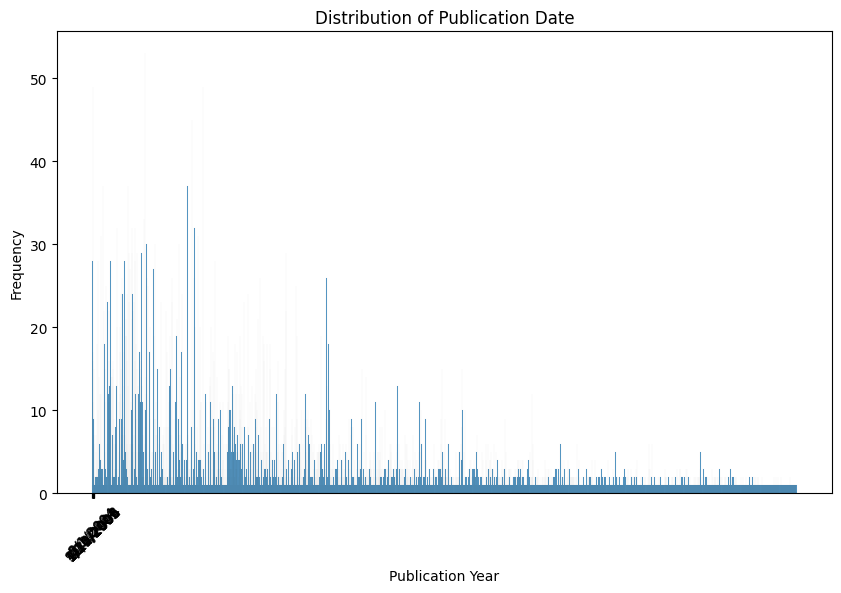

In [ ]:
# Distribution of publication date by decade
plt.figure(figsize=(10, 6))
sns.histplot(books_df['publication_date'], bins=10, kde=False)
plt.title('Distribution of Publication Date')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.xticks(np.arange(10), )

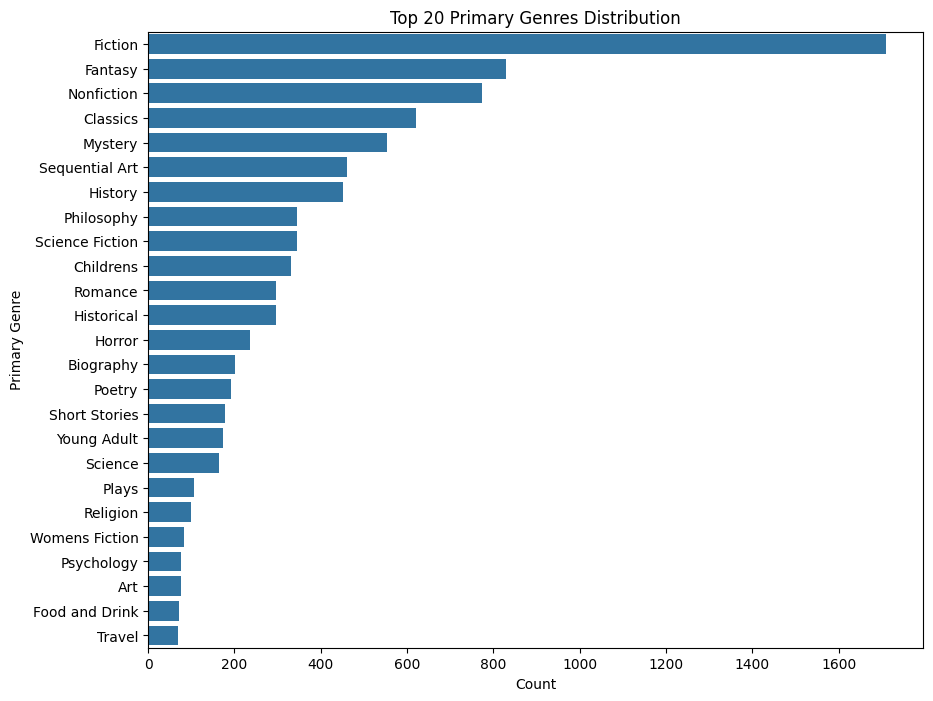

In [10]:
# graph primary genre distribution of top 20 genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres_df['genre_1'], order=genres_df['genre_1'].value_counts().index[:25])
plt.title('Top 20 Primary Genres Distribution')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()

In [11]:
# total genre distribution
genre1_counts = genres_df['genre_1'].value_counts()
genre2_counts = genres_df['genre_2'].value_counts()
genre3_counts = genres_df['genre_3'].value_counts()
genre4_counts = genres_df['genre_4'].value_counts()
# Combine counts so a genre that appears as either first or second is counted together
combined = genre1_counts.add(genre2_counts, fill_value=0).add(genre3_counts, fill_value=0).add(genre4_counts, fill_value=0).sort_values(ascending=False)

Fiction              4366.0
Nonfiction           2217.0
Fantasy              1649.0
Classics             1594.0
Mystery              1290.0
                      ...  
Unfinished              1.0
Weird Fiction           1.0
Vietnam War             1.0
Tragedy                 1.0
World Of Warcraft       1.0
Name: count, Length: 250, dtype: float64


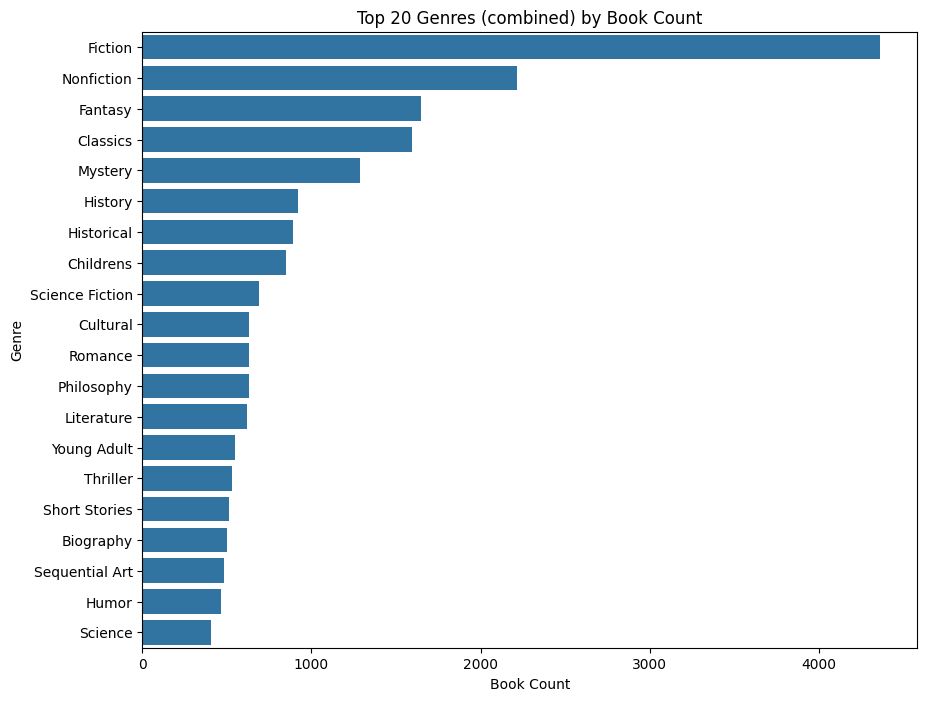

In [13]:
#  number of books in each genre
print(combined)
# graph top 20 genres
plt.figure(figsize=(10, 8))
sns.barplot(y=combined.index[:20], x=combined.values[:20])
plt.title('Top 20 Genres (combined) by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# average rating by genre


250
Fiction       4379.0
Nonfiction    2225.0
Fantasy       1660.0
Classics      1606.0
Mystery       1291.0
               ...  
Sociology       47.0
Space           47.0
Action          45.0
Education       44.0
Crime           42.0
Name: count, Length: 70, dtype: float64


In [ ]:

# average number of pages by genre

# count of ratings by genre

# count of text reviews by genre

In [ ]:
# visualize genre distribution
# Plot top 20 genres
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
combined.head(20).plot(kind='bar')
plt.title('Top 20 Genres (counting only first two genres per book)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# How many different authors? 

# how many publishers? How many books per publisher? Top genres for each publisher?

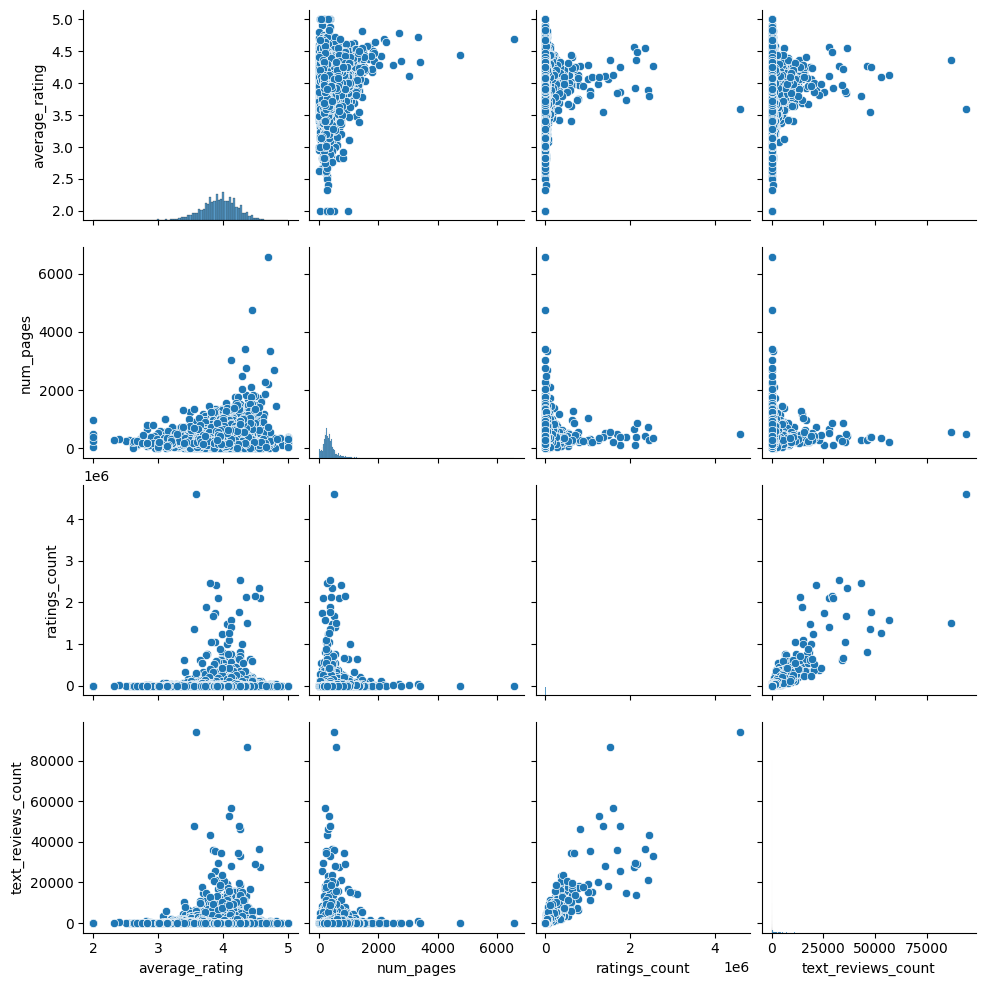

In [17]:
# scatterplot matrix
sns.pairplot(books_df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']])

##### What is the ideal book length of each genre?

                               n_books  mean_pages  median_pages   std_pages  \
genre                                                                          
Fiction                           4177  383.050515         339.0  217.937087   
Nonfiction                        2036  336.683694         302.0  194.640749   
Classics                          1525  387.667541         317.0  277.899497   
Fantasy                           1099  359.649682         325.0  212.689346   
Mystery                            680  360.639706         342.0  161.400419   
History                            663  414.033183         368.0  236.139505   
Historical,Historical Fiction      610  430.436066         384.0  220.025301   
Science Fiction                    503  354.391650         320.0  179.238395   
Philosophy                         459  340.357298         273.0  255.806377   
Romance                            435  349.052874         343.0  144.158353   
Childrens                          413  

C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres_list'] = df.apply(genres_list, axis=1)


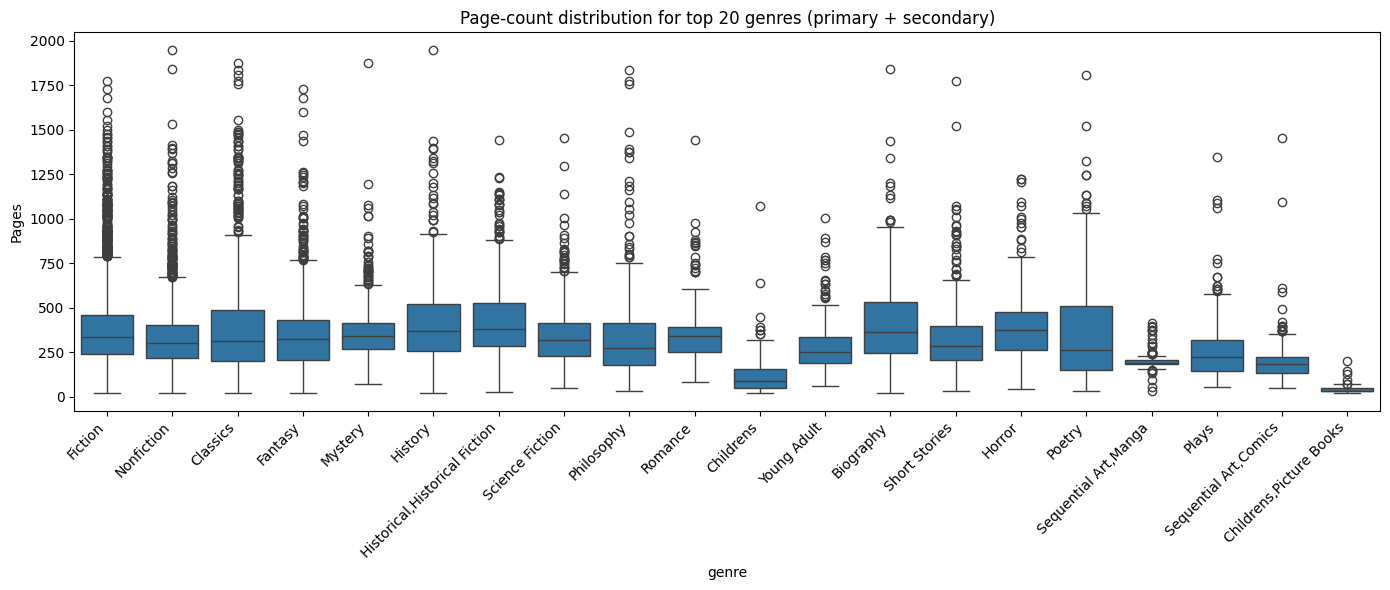

C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 


Suggested ideal page ranges (primary + secondary):
                            genre ideal_page_range  mean_rating_in_range  \
0                         Fiction        1270-1374              4.249409   
1                      Nonfiction        1062-1166              4.384450   
2                        Classics        1062-1166              4.292845   
3                         Fantasy          645-749              4.499939   
4                         Mystery          228-332              4.058794   
5                         History          853-957              4.285082   
6   Historical,Historical Fiction          853-957              4.318870   
7                 Science Fiction          749-853              4.281435   
8                      Philosophy          541-645              4.062836   
9                         Romance          645-749              4.271661   
10                      Childrens          332-436              4.407731   
11                    Young Adult   

C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
C:\Users\noamh\AppData\Local\Temp\ipykernel_2352\3059422386.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

In [14]:
# filter extreme outliers for visuals/analysis
df = books_df[(books_df['num_pages'] >= 20) & (books_df['num_pages'] <= 2000)]

# build list of genres from primary and secondary, exclude Unknown / null
def genres_list(row):
    gs = []
    for g in [row.get('genre_1'), row.get('genre_2')]:
        if pd.notna(g) and str(g).strip() and str(g).strip().lower() != 'unknown':
            gs.append(str(g).strip())
    return list(dict.fromkeys(gs))  # preserve order, dedupe

df['genres_list'] = df.apply(genres_list, axis=1)

# explode so each book appears once per valid genre (counts toward both primary & secondary)
df_expl = df.explode('genres_list').dropna(subset=['genres_list']).rename(columns={'genres_list':'genre'})

# choose top N primary genres by count
top_n = 20
top_genres = df_expl['genre'].value_counts().head(top_n).index.tolist()
df_top = df_expl[df_expl['genre'].isin(top_genres)].copy()

# per-genre summary
summary = df_top.groupby('genre').agg(
    n_books=('Title','count'),
    mean_pages=('num_pages','mean'),
    median_pages=('num_pages','median'),
    std_pages=('num_pages','std'),
    mean_rating=('average_rating','mean'),
    median_rating=('average_rating','median')
).sort_values('n_books', ascending=False)
print(summary)

# boxplot of distributions for top genres
plt.figure(figsize=(14,6))
order = summary.index.tolist()
sns.boxplot(data=df_top, x='genre', y='num_pages', order=order)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pages')
plt.title(f'Page-count distribution for top {top_n} genres (primary + secondary)')
plt.tight_layout()
plt.show()

# heuristic: find best binned page range per genre using ratings_count-weighted mean rating
bins = np.linspace(20, 2000, 20)  # adjustable
results = []
min_support = 5

for g in top_genres:
    sub = df_expl[df_expl['genre'] == g].copy()
    if len(sub) < min_support:
        continue
    sub['page_bin'] = pd.cut(sub['num_pages'], bins)
    def weighted_rating(group):
        total_weights = group['ratings_count'].sum()
        if total_weights > 0:
            return (group['average_rating'] * group['ratings_count']).sum() / total_weights
        return group['average_rating'].mean()
    grouped = sub.groupby('page_bin').apply(lambda gg: pd.Series({
        'weighted_mean_rating': weighted_rating(gg),
        'count': len(gg)
    })).reset_index()
    grouped = grouped[grouped['count'] >= min_support]
    if grouped.empty:
        continue
    best = grouped.loc[grouped['weighted_mean_rating'].idxmax()]
    left = int(best['page_bin'].left)
    right = int(best['page_bin'].right)
    results.append({
        'genre': g,
        'ideal_page_range': f'{left}-{right}',
        'mean_rating_in_range': float(best['weighted_mean_rating']),
        'books_in_range': int(best['count']),
        'total_books_genre': int(len(sub))
    })

ideal_df = pd.DataFrame(results).sort_values('total_books_genre', ascending=False)
print("\nSuggested ideal page ranges (primary + secondary):")
print(ideal_df)

# # save outputs
# summary.to_csv('genre_page_summary_primary_and_secondary.csv')
# ideal_df.to_csv('genre_ideal_page_ranges_primary_and_secondary.csv', index=False)

##### what is the ideal word count per genre

In [21]:
# Can I write a script that while use a website to find the word count of each book and add it to the df?
# Selenium test to scrape wordcounters.com for the first 15 titles
# NOTE: This cell will NOT be executed here. Run it locally in your environment.

# Install packages if needed (uncomment to run once)
# !pip install selenium webdriver-manager

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

In [22]:
# Choose browser: Chrome. On Windows this should work if Chrome is installed.
options = webdriver.ChromeOptions()
# optional: run headless for testing without GUI (may affect site behaviour)
# options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
wait = WebDriverWait(driver, 15)

results = []

titles = books_df['title'].dropna().unique()[:15]
for title in titles:
    try:
        driver.get('https://wordcounters.com')
        # wait for the main textarea to be present
        textarea = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'textarea')))
        # clear and enter title
        textarea.clear()
        textarea.send_keys(title)
        # submit: the site updates counts automatically; sometimes sending ENTER helps
        textarea.send_keys(Keys.ENTER)
        # wait a short while for counts to update
        time.sleep(1)
        # find the word count element -- selector may need adjustment if site changes
        # common selector: an element with id or class containing 'words' or 'word-count'
        # We'll try a few fallbacks.

        # inside your for title in titles: loop, after page load and short wait
        try:
            # wait until the book-details div is present/visible (adjust timeout if needed)
            book_details = wait.until(
                EC.visibility_of_element_located((By.CSS_SELECTOR, "div.book-details"))
            )
            text = book_details.text  # e.g. "71,712 Words - \n Calculated | Explain"
            # extract the number just before the word 'Words'
            m = re.search(r'([\d,]+)\s*Words', text, flags=re.IGNORECASE)
            if m:
                num = int(m.group(1).replace(',', ''))
                word_count_text = num
            else:
                # fallback: maybe the element text differs; set as 'N/A' or None
                word_count_text = None
        except Exception:
            # fallback if CSS selector failed, try another heuristic or set None
            try:
                # second fallback: search for any element that contains 'Words' in page
                page_text = driver.page_source
                m2 = re.search(r'([\d,]+)\s*Words', page_text, flags=re.IGNORECASE)
                word_count_text = int(m2.group(1).replace(',', '')) if m2 else None
            except Exception:
                word_count_text = None
                
        results.append({'title': title, 'word_count_scraped': word_count_text})

    except Exception as e:
        results.append({'title': title, 'word_count_scraped': None, 'error': str(e)})

# Close browser
driver.quit()

results_df = pd.DataFrame(results)
results_df.head(20)

# If results look good, you can merge back into books_df on title and save to CSV
# books_df = books_df.merge(results_df, on='title', how='left')
# books_df.to_csv('books_with_scraped_wordcounts.csv', index=False)

TypeError: WebDriver.__init__() got multiple values for argument 'options'

(optional) book recommendation system